# Exam 2 Fall 2023 (100 pts total)

files needed = ('fish.csv', 'room_char.xlsx', 'cpi.csv', 'cb_2022_55_tract_500k.zip', 'wdi.csv'), which can be found in `exam2_data.zip`

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet.  
* You **cannot** work with others on the exam. You cannot post questions online and solicit answers, e.g., through Chegg or chat GPT.
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

## Question 0 (5 pts): Last, First
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import geopandas as gpd

C:\Users\kimru\anaconda3\envs\geo3\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


## Question 1 (15 points): 

Below are two DataFrames. Insert a markdown cell below this one, and use the DataFrames to answer the following questions. You do not need to write any code for this question.

1. How many rows and columns does Z have after running the following code?
```python
z = pd.merge(left=X, right=Y, on='id', how='inner')
```
2. How many rows and columns does Z have after running the following code? How many missing values are in `Z['price']`?
```python
z = pd.merge(left=X, right=Y, on='id', how='right')
```


### DataFrame X

| id     | qty |
|--------|-----|
| pear   | 2   |
| orange | 13  |
| Banana | 89  |
| apple  | 1   |

### DataFrame Y

| id      | price |
|---------|-------|
| orange  | 0.5   |
| pear    | 1.2   |
| Bannana | 0.1   |
| apple   | 1.25  |
| kiwi    | 1.75  |


1. columns = 3, rows = 3 (pear, orange, apple)
2. columns = 3, rows = 5; missing values in `Z['price']` = 2 (unmatched Bannana and kiwi)

## Question 2 (10 points): MultiIndex

1. Load the file `fish.csv`
   * The column index should be a multiIndex with 'Family' at level 0 and 'Type' at level 1
   * The row index should be a multiIndex with date at level 0 and state at level 1
   
   
2. Print out a DataFrame that contains only the observations from 2023

In [2]:
fish = pd.read_csv('fish.csv', header=[0,1], index_col=[0,1], parse_dates=[0])
fish.sort_index(inplace=True)

In [3]:
fish.loc['2023']

Bass                         Snapper              \
              Large mouth Small mouth Striped Nothern red Mutton Lane   
2023-01-01 FL           1           0       0           0      0    0   
2023-02-15 WI           0           0       0           0      0    0   
2023-04-04 AK           0           0       0           0      0    0   
2023-05-07 FL           0           2       0           0      0    0   
2023-08-09 WI           0           0       0           0      0    0   
2023-09-05 GA           4           0       0           0      0    0   
2023-09-06 WI           2           0       0           0      0    0   
2023-10-07 AL           0           0       0           0      0    0   

                            
              Mangrove red  
2023-01-01 FL            3  
2023-02-15 WI            0  
2023-04-04 AK            0  
2023-05-07 FL            0  
2023-08-09 WI            0  
2023-09-05 GA            0  
2023-09-06 WI            0  
2023-10-07 AL            0

## Question 3 (20 points): Grouping

1. Load the file `room_char.xlsx`
2. Create a DataFrame named that holds the number of rooms with windows and without windows for each building
    * The row index should have BLDG at level 0 and WINDOWS at level 1
    * There is only one column, which holds the room counts. Name the column `ROOM COUNT`
3. Print out your DataFrame

For example, the first two rows of this DataFrame would be 

|            |       |    |
|------------|-------|---|
|CHAMBERLIN  |  NO   | 7 |
|CHAMBERLIN  |  YES  | 5 |

In [4]:
room = pd.read_excel('room_char.xlsx')
room.head(2)

BLDG  ROOM  CAPACITY WINDOWS
0  SEWELL     1         3     YES
1  SEWELL     2         3     YES

In [5]:
room_counts = room[['BLDG', 'WINDOWS', 'ROOM']].groupby(['BLDG', 'WINDOWS']).count()
room_counts.rename(columns={'ROOM':'ROOM COUNT'}, inplace=True)
room_counts

ROOM COUNT
BLDG       WINDOWS            
CHAMBERLIN NO                7
           YES               5
SEWELL     NO                4
           YES               6
VILAS      YES               4

## Question 4 (15 points): Time series

1. Load the file `cpi.csv`. It contains data on the consumer price index.
2. Create a CPI variable  at the quarterly frequency
3. Plot the quarterly CPI. Make your figure graphically excellent.
4. Add a vertical line to your plot at August 1, 2020

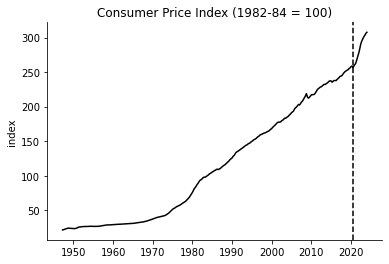

In [6]:
cpi = pd.read_csv('cpi.csv', parse_dates=['DATE'], index_col='DATE')
cpiq = cpi.resample('Q').mean()

fig, ax = plt.subplots()
ax.plot(cpiq.index, cpiq['CPIAUCSL'], color='black')
ax.axvline(x=dt.datetime(2020,8,1), color='black', ls='--')
ax.set_title('Consumer Price Index (1982-84 = 100)')
ax.set_ylabel('index')

sns.despine()

## Question 5 (15 points): 

The file `cb_2022_55_tract_500k.zip` contains the shapefile for the census tracts in Wisconsin, downloaded from [here](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html). 

1. Create a map of only the census tracts in Dane County. Use a white background and black edges.
2. Lake Mendota is tract 9917.02 and Lake Monona is tract 9917.03. Color these two tracts skyblue. 


In [8]:
dane = gpd.read_file('cb_2022_55_tract_500k.zip')

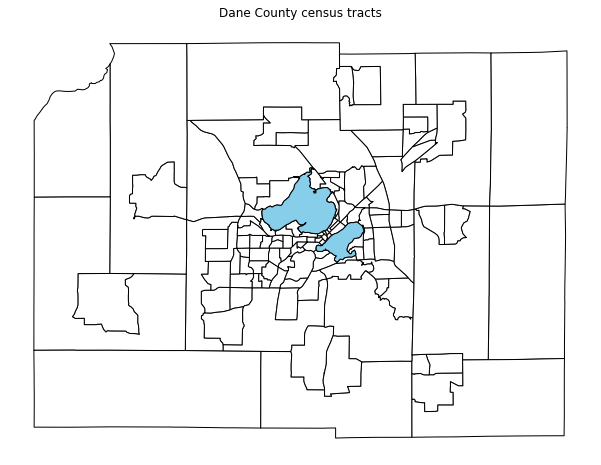

In [9]:
fig, ax = plt.subplots(figsize=(15,8))

dane[dane['NAMELSADCO']=='Dane County'].plot(color='white', edgecolor='black', ax=ax)
dane[dane['NAME'].isin(['9917.03','9917.02'])].plot(color='skyblue', edgecolor='black', ax=ax)

ax.set_title('Dane County census tracts')
ax.axis('off')
plt.show()

## Question 6 (10 points): 

1. Use the code below to create a DataFrame


```python
ads = pd.DataFrame({'address':['1180 Observatory Dr.;Madison;WI;53706', '1220 Linden Dr.;Madison;WI;53706']})
```

1. Extract the street, city, state, and zip out of the address variable and save them in columns named named `Street`, `City`, `State`, and `Zip`. 

The first row should look like:

|address|Street|City|State|Zip|
|-------|------|----|-----|---|
|1180 Observatory Dr.;Madison;WI;53706|1180 Observatory Dr.|Madison|WI|53706|


In [10]:
ads = pd.DataFrame({'address':['1180 Observatory Dr.;Madison;WI;53706', '1220 Linden Dr.;Madison;WI;53706']})

In [11]:
ads[['Street', 'City', 'State', 'Zip']] = ads['address'].str.split(';', expand=True)
ads

address                Street     City State  \
0  1180 Observatory Dr.;Madison;WI;53706  1180 Observatory Dr.  Madison    WI   
1       1220 Linden Dr.;Madison;WI;53706       1220 Linden Dr.  Madison    WI   

     Zip  
0  53706  
1  53706

## Question 7 (10 points): 

The file `wdi.csv` contains a panel of data. It covers the United States and Germany from 1998 to 2022. For each country and year, it measures service exports and GDP.

1. Insert a markdown cell below this one and write which part of the data should be columns and which should be rows in order to make the data "tidy."

Insert a code cell below your answer from part 1 and 

2. Load the `wdi.csv` file into a DataFrame. 

3. Reshape the DataFrame to match your answer from part 1.
4. Sort your row index and print out your DataFrame.

Tidy data has observations as rows and variables as columns. In this case, I want the country and time to be the rows and service exports and gdp to be the columns. 

In [12]:
wdi = pd.read_csv('wdi.csv', index_col=['Country Name', 'Country Code', 'Series Name', 'Series Code']).stack()
wdi.unstack(['Series Name', 'Series Code']).sort_index()

Series Name                     Commercial service exports (current US$)  \
Series Code                                            TX.VAL.SERV.CD.WT   
Country Name  Country Code                                                 
Germany       DEU          1998                             7.716637e+10   
                           1999                             7.648444e+10   
                           2000                             7.785096e+10   
                           2001                             7.843019e+10   
                           2002                             9.281096e+10   
                           2003                             1.127450e+11   
                           2004                             1.438780e+11   
                           2005                             1.563170e+11   
                           2006                             1.782880e+11   
                           2007                             2.080620e+11   
                           2008                             2.392090e+11   
                           2009                             2.216440e+11   
                           2010                             2.259540e+11   
                           2011                             2.505440e+11   
                           2012                             2.508420e+11   
                           2013                             2.713350e+11   
                           2014                             2.979800e+11   
                           2015                             2.758300e+11   
                           2016                             2.883330e+11   
                           2017                             3.173810e+11   
                           2018                             3.511200e+11   
                           2019                             3.610550e+11   
                           2020                             3.266040e+11   
                           2021                             4.013260e+11   
                           2022                             4.226560e+11   
United States USA          1998                             2.404860e+11   
                           1999                             2.697780e+11   
                           2000                             2.888670e+11   
                           2001                             2.758420e+11   
                           2002                             2.804080e+11   
                           2003                             2.887030e+11   
                           2004                             3.325520e+11   
                           2005                             3.629070e+11   
                           2006                             4.038650e+11   
                           2007                             4.747370e+11   
                           2008                             5.217060e+11   
                           2009                             5.019200e+11   
                           2010                             5.628350e+11   
                           2011                             6.231990e+11   
                           2012                             6.626740e+11   
                           2013                             6.975640e+11   
                           2014                             7.373560e+11   
                           2015                             7.493160e+11   
                           2016                             7.646530e+11   
                           2017                             8.175490e+11   
                           2018                             8.434140e+11   
                           2019                             8.686460e+11   
                           2020                             7.043200e+11   
                           2021                             7.781880e+11   
                           2022                 